#  Credit Risk WoE Binning

### This notebook performs Weight of Evidence (WoE) binning for RFM features ,goal is to preprocess features for a credit risk model.

In [ ]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
from credit_risk_woe import calculate_woe, visualize_woe, setup_logging

In [3]:
# Initialize logger
logger = setup_logging()

# Load Data (The RFM dataset)

In [4]:
logger.info("Loading RFM dataset")
try:
    df = pd.read_csv('../data/My_RFMScore.csv')
    logger.info(f"Dataset loaded with shape: {df.shape}")
    display(df.head())
except Exception as e:
    logger.error(f"Error loading data: {str(e)}")
    raise

2025-06-29 13:25:05,490 - INFO - Loading RFM dataset
2025-06-29 13:25:06,124 - INFO - Dataset loaded with shape: (95662, 33)


,index,TransactionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AverageTransactionAmount,TotalTransactions,...,ProductCategory_utility_bill,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,RFMS_Label,User_Label
0,0,TransactionId_76871,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,-0.311831,...,0,0,0,1,0,90,119,109921.75,1,Bad
1,1,TransactionId_73770,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,-0.311831,...,0,0,1,0,0,90,119,109921.75,1,Bad
2,2,TransactionId_26203,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,-0.444993,...,0,0,0,1,0,90,2,1000.00,1,Bad
3,3,TransactionId_380,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,-0.404020,...,1,0,0,1,0,90,38,228727.20,1,Bad
4,4,TransactionId_28195,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,-0.404020,...,0,0,1,0,0,90,38,228727.20,1,Bad


# Create Binary Target
### Convert RFMS_Label to a binary target (Good_Bad: 1 for good, 0 for bad).

In [5]:
logger.info("Creating binary target column")
df['Good_Bad'] = df['RFMS_Label'].apply(lambda x: 1 if x == 1 else 0)
logger.info(f"Binary target distribution:\n{df['Good_Bad'].value_counts()}")

2025-06-29 13:25:24,251 - INFO - Creating binary target column
2025-06-29 13:25:24,331 - INFO - Binary target distribution:
Good_Bad
1    78570
0    17092
Name: count, dtype: int64


# Bin Features
### Bin Recency, Frequency, and Monetary into 10 quantiles each.

In [6]:
logger.info("Binning RFM features")
try:
    df['Recency_Bin'] = pd.qcut(df['Recency'], q=10, duplicates='drop', labels=False)
    df['Frequency_Bin'] = pd.qcut(df['Frequency'], q=10, duplicates='drop', labels=False)
    df['Monetary_Bin'] = pd.qcut(df['Monetary'], q=10, duplicates='drop', labels=False)
    logger.info("Feature binning completed")
    display(df[['Recency_Bin', 'Frequency_Bin', 'Monetary_Bin']].head())
except Exception as e:
    logger.error(f"Error during binning: {str(e)}")
    raise

2025-06-29 13:26:30,921 - INFO - Binning RFM features
2025-06-29 13:26:30,960 - INFO - Feature binning completed


,Recency_Bin,Frequency_Bin,Monetary_Bin
0,9,5,3
1,9,5,3
2,9,0,0
3,9,2,5
4,9,2,5


# Calculate WoE
### Compute WoE for each binned feature.

In [7]:
logger.info("Calculating WoE for binned features")
woe_results = {}
features = ['Recency_Bin', 'Frequency_Bin', 'Monetary_Bin']

for feature in features:
    woe_results[feature] = calculate_woe(df, feature, 'Good_Bad')
    print(f"WoE for {feature}:\n{woe_results[feature]}\n")

2025-06-29 13:27:17,449 - INFO - Calculating WoE for binned features
2025-06-29 13:27:17,450 - INFO - Calculating WoE for feature: Recency_Bin
2025-06-29 13:27:17,469 - INFO - WoE calculation successful for Recency_Bin
2025-06-29 13:27:17,473 - INFO - Calculating WoE for feature: Frequency_Bin
2025-06-29 13:27:17,490 - INFO - WoE calculation successful for Frequency_Bin
2025-06-29 13:27:17,493 - INFO - Calculating WoE for feature: Monetary_Bin
2025-06-29 13:27:17,508 - INFO - WoE calculation successful for Monetary_Bin


WoE for Recency_Bin:
                   woe
Recency_Bin           
0            -0.985680
1            -1.103497
2            -0.996798
3            -0.918624
4            -0.606829
5            21.449073
6            21.490017
7            21.508440
8            21.385958
9            21.412951

WoE for Frequency_Bin:
                     woe
Frequency_Bin           
0              21.458399
1              21.459650
2              21.469909
3              21.464948
4              21.443584
5              -0.691533
6              -0.821523
7              -1.222744
8              -1.703928
9               0.106654

WoE for Monetary_Bin:
                    woe
Monetary_Bin           
0             21.456729
1             21.456311
2             21.457355
3             21.460170
4             21.454637
5             -0.446438
6             -0.541092
7             -1.117085
8             -1.153719
9             -1.350680



# Visualize WoE
#### Plot WoE values for each feature.

2025-06-29 13:29:27,328 - INFO - Visualizing WoE for all features
2025-06-29 13:29:27,330 - INFO - Creating WoE plot for Recency_Bin
2025-06-29 13:29:27,362 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-29 13:29:27,376 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-29 13:29:27,778 - INFO - WoE plot saved to C:\Users\HP\10 Acadamy PRojects\New folder (5)\Altdata-lending-risk-model\data\woe_Recency_Bin.png


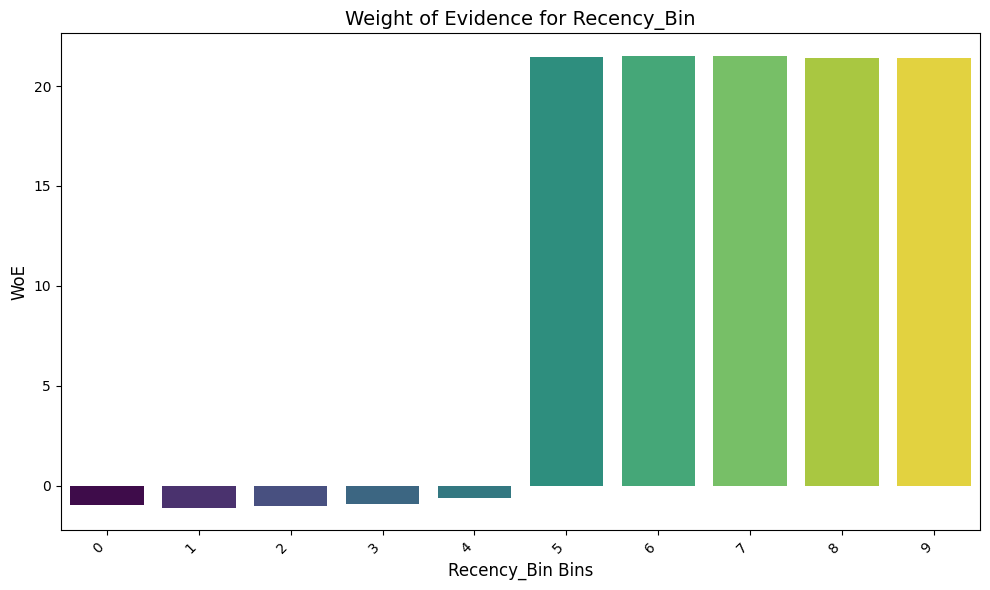

2025-06-29 13:29:27,892 - INFO - WoE plot completed for Recency_Bin
2025-06-29 13:29:27,892 - INFO - Creating WoE plot for Frequency_Bin
2025-06-29 13:29:27,917 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-29 13:29:27,933 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-29 13:29:28,362 - INFO - WoE plot saved to C:\Users\HP\10 Acadamy PRojects\New folder (5)\Altdata-lending-risk-model\data\woe_Frequency_Bin.png


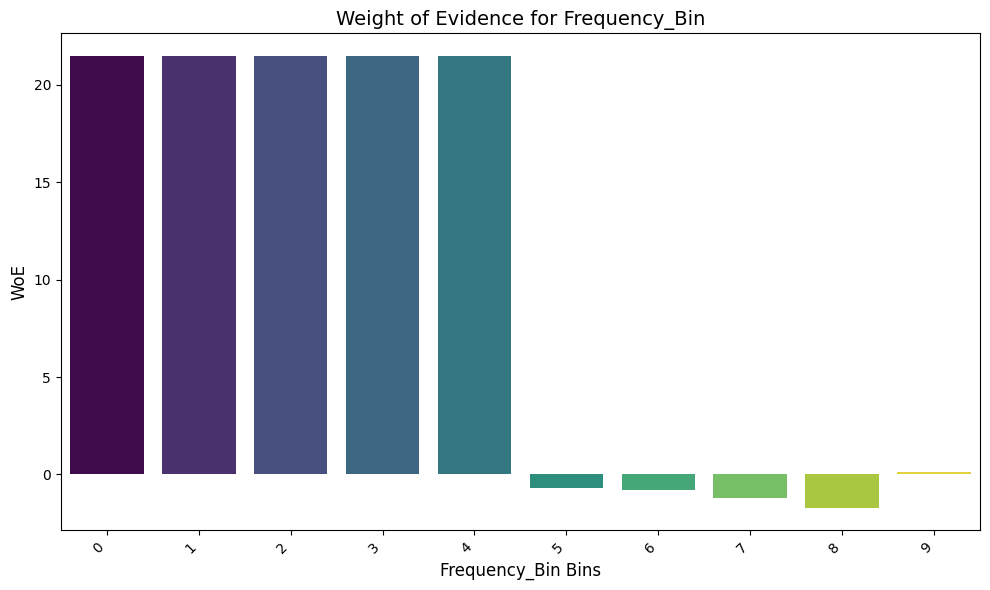

2025-06-29 13:29:28,480 - INFO - WoE plot completed for Frequency_Bin
2025-06-29 13:29:28,481 - INFO - Creating WoE plot for Monetary_Bin
2025-06-29 13:29:28,509 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-29 13:29:28,521 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-06-29 13:29:28,802 - INFO - WoE plot saved to C:\Users\HP\10 Acadamy PRojects\New folder (5)\Altdata-lending-risk-model\data\woe_Monetary_Bin.png


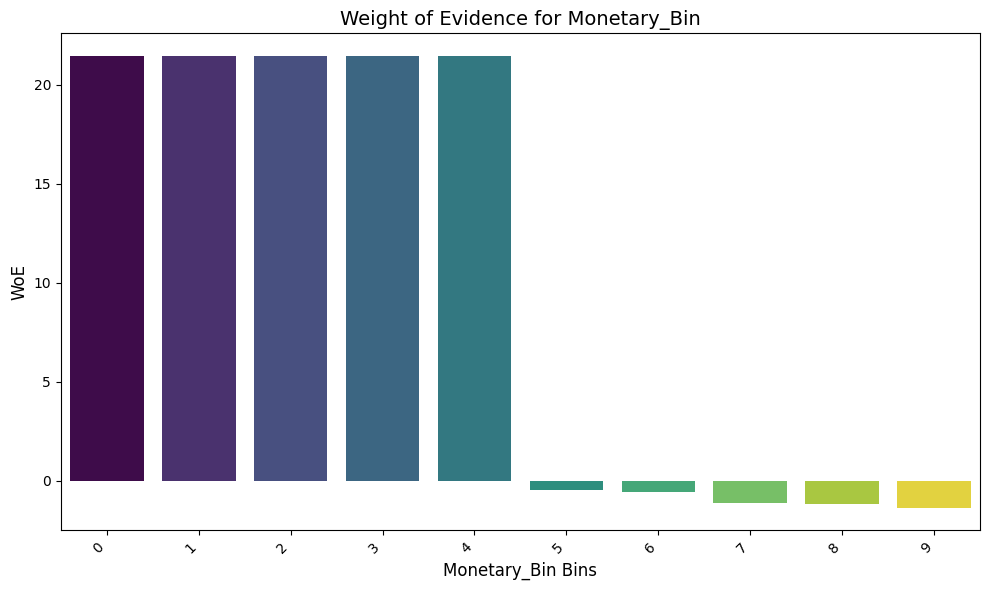

2025-06-29 13:29:28,942 - INFO - WoE plot completed for Monetary_Bin


In [10]:
import os

output_dir = r"C:\Users\HP\10 Acadamy PRojects\New folder (5)\Altdata-lending-risk-model\data"
os.makedirs(output_dir, exist_ok=True)  # Ensure the folder exists

logger.info("Visualizing WoE for all features")
for feature in features:
    save_path = os.path.join(output_dir, f'woe_{feature}.png')
    visualize_woe(woe_results[feature], feature, save_path=save_path)


# Save Results

## saves the Woe results as three CSV files—woe_Recency_Bin.csv, woe_Frequency_Bin.csv, and woe_Monetary_Bin.csv

In [20]:
logger.info("Saving processed data")
# Save main DataFrame
df.to_csv('../data/credit_risk_woe.csv', index=False)
logger.info("Saved main DataFrame to ../data/credit_risk_woe.csv")

# Debug: Print woe_results keys
print("woe_results keys:", list(woe_results.keys()))

# Save WoE DataFrames
for feature, woe_df in woe_results.items():
    file_path = f'../data/woe_{feature}.csv'
    logger.info(f"Saving WoE for {feature} to {file_path}")
    if os.path.exists(file_path):
        os.remove(file_path)
        logger.info(f"Removed existing file: {file_path}")
    woe_df.to_csv(file_path)
    logger.info(f"Saved WoE for {feature} to {file_path}")

logger.info("Data and WoE results saved successfully")

2025-06-29 14:06:21,629 - INFO - Saving processed data
2025-06-29 14:06:31,381 - INFO - Saved main DataFrame to ../data/credit_risk_woe.csv
2025-06-29 14:06:31,391 - INFO - Saving WoE for Recency_Bin to ../data/woe_Recency_Bin.csv
2025-06-29 14:06:31,400 - INFO - Saved WoE for Recency_Bin to ../data/woe_Recency_Bin.csv
2025-06-29 14:06:31,408 - INFO - Saving WoE for Frequency_Bin to ../data/woe_Frequency_Bin.csv
2025-06-29 14:06:31,429 - INFO - Saved WoE for Frequency_Bin to ../data/woe_Frequency_Bin.csv
2025-06-29 14:06:31,434 - INFO - Saving WoE for Monetary_Bin to ../data/woe_Monetary_Bin.csv
2025-06-29 14:06:31,446 - INFO - Saved WoE for Monetary_Bin to ../data/woe_Monetary_Bin.csv
2025-06-29 14:06:31,455 - INFO - Data and WoE results saved successfully


woe_results keys: ['Recency_Bin', 'Frequency_Bin', 'Monetary_Bin']


# # Merge all WoE DataFrames into a single CSV

In [15]:
combined_woe = pd.concat([woe_results[feature].rename(columns={'woe': f'woe_{feature}'}) for feature in woe_results], axis=1)
combined_woe.to_csv('../data/woe_all_features.csv')

# Map WoE Values to DataFrame

In [16]:
for feature in ['Recency_Bin', 'Frequency_Bin', 'Monetary_Bin']:
    df[f'{feature}_WoE'] = df[feature].map(woe_results[feature]['woe'])
df.to_csv('../data/credit_risk_woe_mapped.csv', index=False)
logger.info("Saved DataFrame with WoE-mapped features")

2025-06-29 13:41:05,756 - INFO - Saved DataFrame with WoE-mapped features


# Validateing WoE Values

In [17]:
for feature in woe_results:
    if woe_results[feature]['woe'].isin([float('inf'), -float('inf'), float('nan')]).any():
        print(f"Warning: {feature} has invalid WoE values")

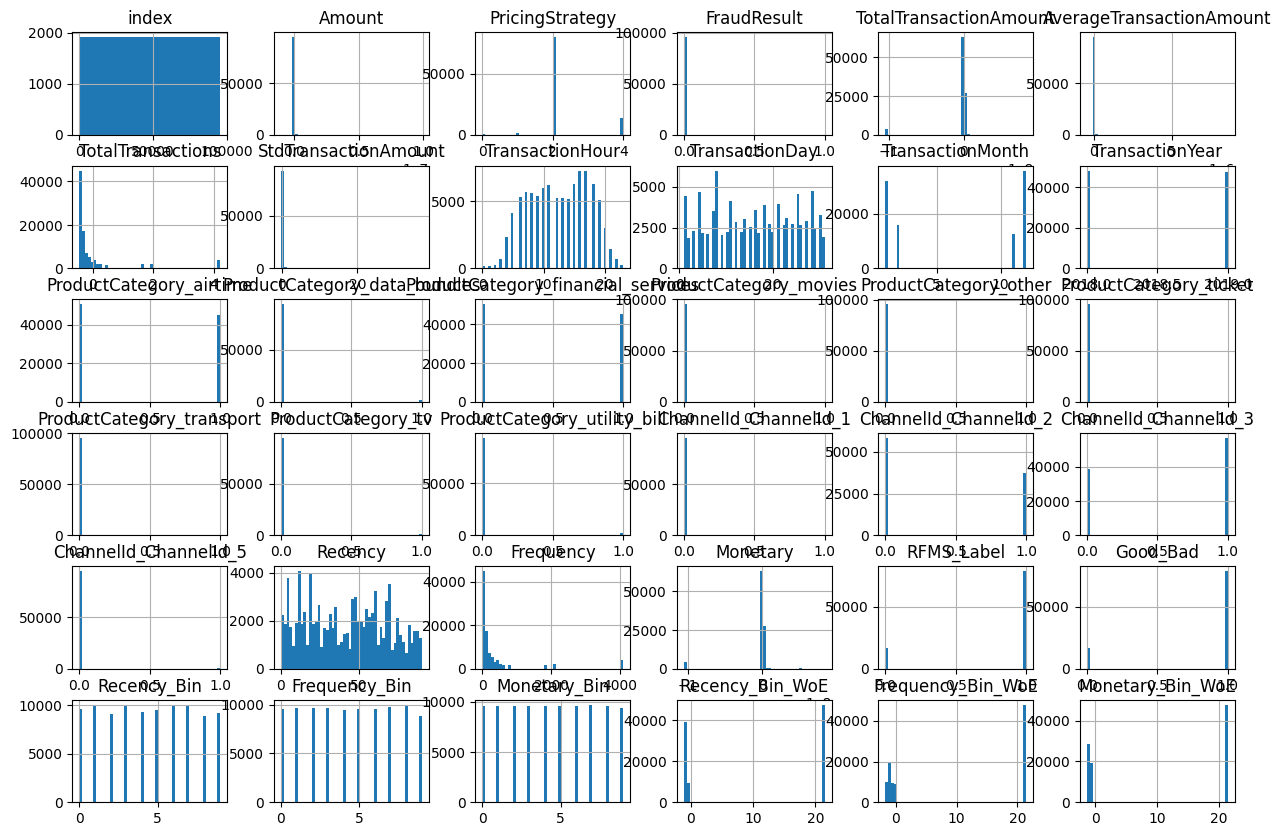

In [19]:
# distribution plots - Histograms
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize = (15, 10), bins = 50);